<a href="https://colab.research.google.com/github/ekqlsrla/ESAA/blob/main/HW/0620_CH06_1_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[파이썬 머신러닝 완벽 가이드]**
---
# **Chapter 06 - 차원축소**

## 1. 차원축소(Dimension Reduction)개요

1) **차원축소** : 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것
* **피처선택** : 특정 피처에 종속성이 강한 **불필요한 피처는 아예 제거**하고, 데이터 특징을 잘 나타내는 **주요 피처만 선택**
* **피처 추출** : 기존 피처를 저차원의 중요 피처로 **압축해서 추출**하는 것 -> 피처를 함축적으로 더 잘 설명할 수 있는 또 다른 공간으로 매핑해 추출하는 것

2) 차원축소알고리즘
* 매우 많은 픽셀로 이뤄진 이미지 데이터에서 잠재된 특성을 피처로 도출해 함축적 형태의 이미지 변환과 압축을 수행할 수 있음
  * 과적합 방지, 예측 성능 끌어올림
* 텍스트 문서의 숨겨진 의미 추출


---
## 2. PCA(Principal Component Analysis)

### 1) PCA개요
: 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 **주성분**을 추출해 차원을 축소하는 기법 > 기존 데이터의 정보유실 최소화하기

(1) PCA는 **가장 높은 분산**을 가지는 데이터의 축을 찾아 차원 축소

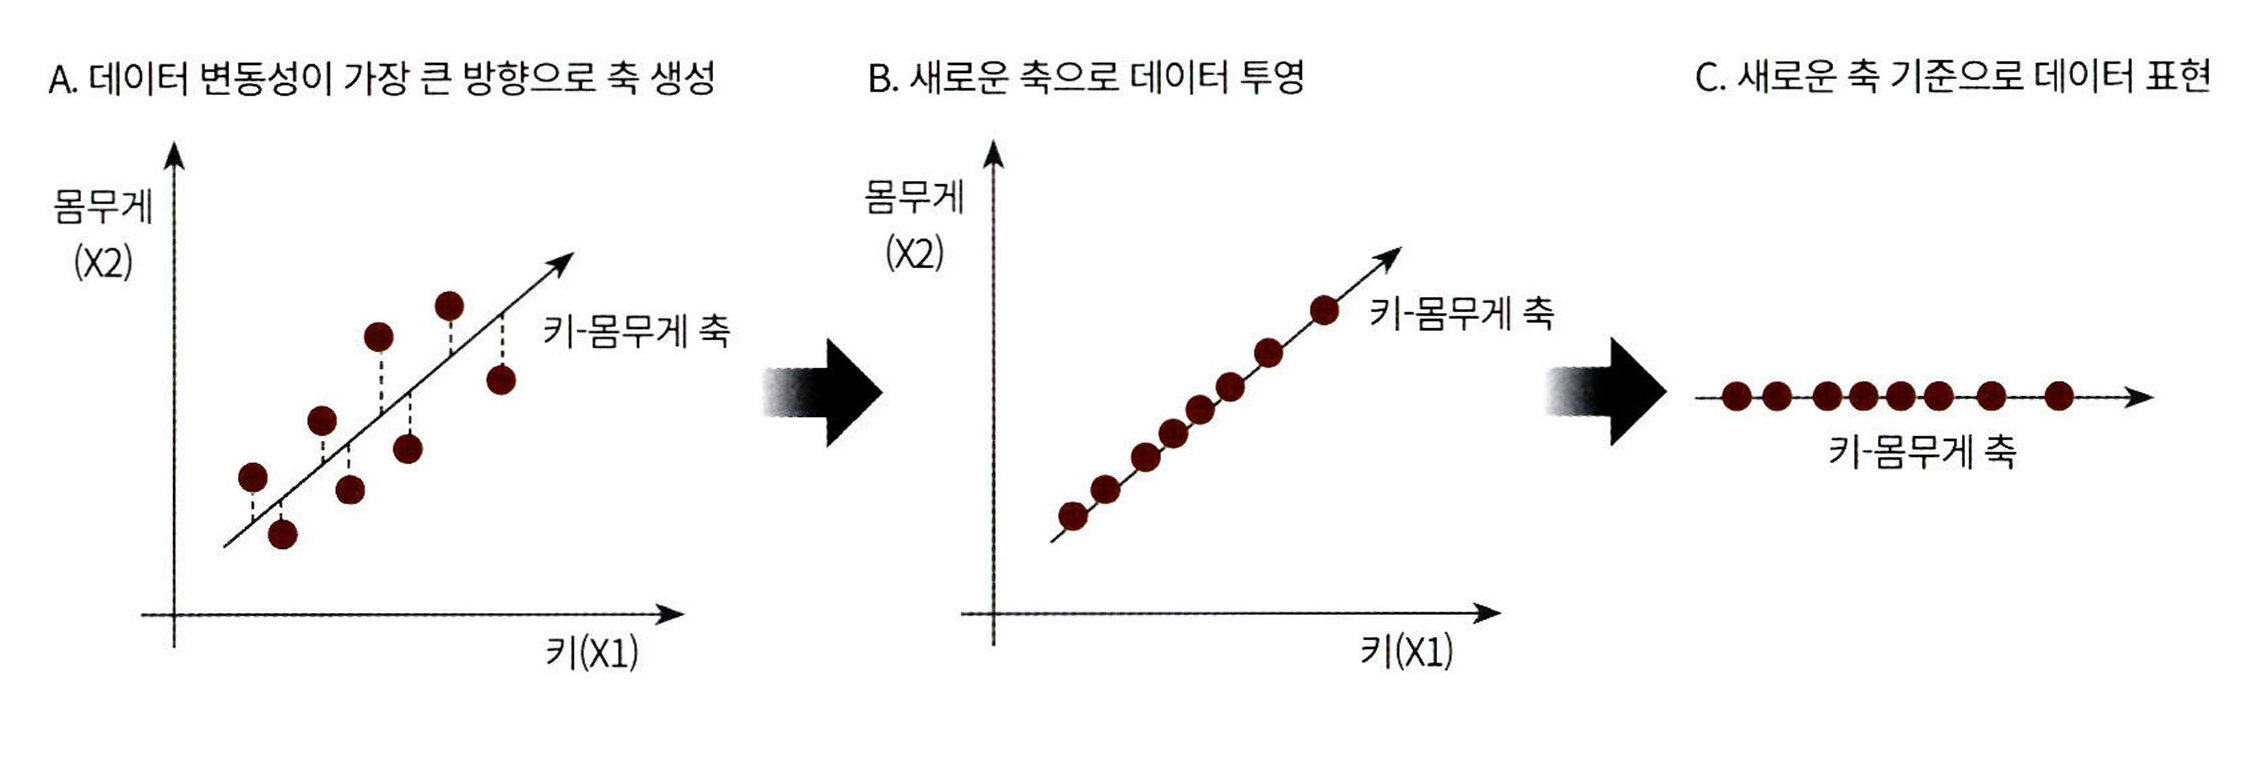

(2) 가장 큰 데이터 변동성을 기반으로 첫 번째 벡터 축을 생성하고, 두 번쨰 축은 이 벡터 축에 **직각**이 되는 벡터를 축으로 함

(3) 세번째 축은 다시 두번쨰 축과 **직각**이 되는 벡터를 설정하는 방식으로 축을 설정

*주성분 분석은 원본 데이터의 피처 개수에 비해 매우 작은 주성분으로 원본 데이터의 총 변동성을 설명할 수 있는 분석법*

(4) 선형 대수 관점
: 입력 데이터의 공분산 행렬을 고유값 분해하고, 고유벡터에 입력 데이터를 선형 변환하는 것
* 고유값 : 고유벡터의 크기, 입력 데이터의 분산

(5) 공분산 $C$는 **고유벡터 직교행렬 X 고유값 정방행렬 X 고유벡터 직교 행렬의 전치 행렬**로 분해됨

$$C = P\sum\ P^T$$

* $C$ : 공분산행렬
* $P$ : n X n의 직교행렬
* $\sum\$ : n X n 의 정방행렬

* $P^T$ : 행렬 $P$의 전치 행렬

(6) PCA의 스텝
```
1. 입력 데이터 세트의 공분산 행렬 생성
2. 공분산 행렬의 고유벡터와 고유값 계산
3. 고유값이 가장 큰 순으로 K개(PCA 변환 차수)만큼 고유벡터 추출
4. 고유값이 가자 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터 반환
```



In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
columns = ['sepal_length','sepal_width','petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns = columns)
irisDF['target'] = iris.target
irisDF.head(3)



,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


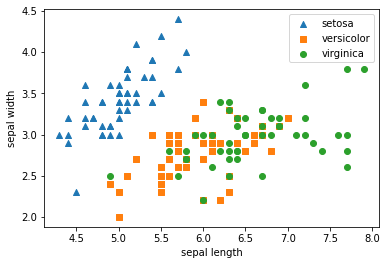

In [ ]:
#데이터 세트 분포 시각화
#setosa는 세모, versicolor는 네모, virginica는 동그라미

markers = ['^','s','o']

for i, marker in enumerate(markers) :
  x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
  y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
  plt.scatter(x_axis_data,y_axis_data,marker = marker,label = iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:,:-1])

* `PCA(n_components)` : **n_components**는 PCA로 변환할 차원 수

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [ ]:
pca_columns = ['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns = pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


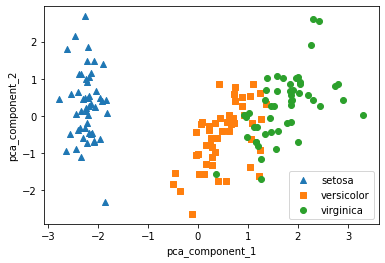

In [ ]:
#분포 확인

markers = ['^','s','o']

for i, marker in enumerate(markers) :
  x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
  y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
  plt.scatter(x_axis_data,y_axis_data,marker = marker,label= iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [ ]:
#전체 변동성에서 개별 PCA컴포넌트별로 차지하는 변동성 비율 
#PCA를 2개 요소로만 변환해도 원본 데이터의 변동성 95%설명 가능

print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state = 156)
scores = cross_val_score(rcf,iris.data,iris.target, scoring = 'accuracy',cv = 3)
print('원본 데이터 교차 검증 개별 정확도 :', scores)
print('원본 데이터 평균 정확도 :', np.mean(scores))

원본 데이터 교차 검증 개별 정확도 : [0.98 0.94 0.96]
원본 데이터 평균 정확도 : 0.96


In [ ]:
#2차원으로 PCA변환한 데이터 세트
pca_X = irisDF_pca[['pca_component_1','pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target,scoring = 'accuracy',cv = 3)
print('PCA 변환 데이터 교차 검증 개별 정확도 : ', scores_pca)
print('PCA 변한 데이터 평균 정확도 :',np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도 :  [0.88 0.88 0.88]
PCA 변한 데이터 평균 정확도 : 0.88


In [ ]:
! pip install openpyxl --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import xlrd

df = pd.read_excel('/content/drive/MyDrive/DATA/credit.card.xls',header = 1, sheet_name = 'Data').iloc[0:,1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [ ]:
df.rename(columns = {'PAY_0' : 'PAY_1', 'default payment next month':'default'}, inplace = True)
y_target = df['default']
X_features = df.drop('default',axis = 1)

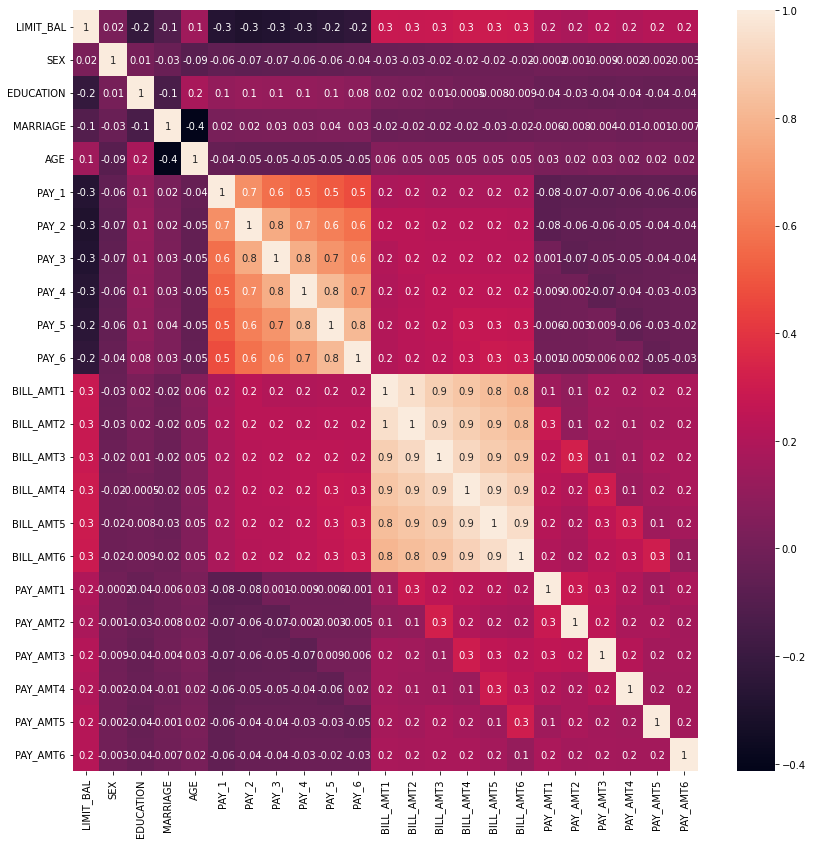

In [ ]:
import seaborn as sns
import matplotlib.pyplot as pandas
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize = (14,14))
sns.heatmap(corr,annot=True,fmt = '.1g')

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
print('대상 속성명',cols_bill)

scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components = 2)
pca.fit(df_cols_scaled)
print("PCA Component별 변동성 :", pca.explained_variance_ratio_)

대상 속성명 ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성 : [0.90555253 0.0509867 ]


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators = 300, random_state = 156)
scores = cross_val_score(rcf,X_features,y_target,scoring = 'accuracy',cv = 3)

print('CV=3인 경우 개별 Fold세트별 정확도 :',scores)
print('평균 정확도 : {0:.4f}'.format(np.mean(scores)))

CV=3인 경우 개별 Fold세트별 정확도 : [0.8083 0.8196 0.8232]
평균 정확도 : 0.8170


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

pca = PCA(n_components = 6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf,df_pca,y_target,scoring = 'accuracy',cv =3)

print('CV=3인 경우 개별 Fold세트별 정확도 :',scores_pca)
print('PCA 변환 데이터 세트 평균 정확도 : {0:.4f}'.format(np.mean(scores)))

CV=3인 경우 개별 Fold세트별 정확도 : [0.7917 0.7988 0.8005]
PCA 변환 데이터 세트 평균 정확도 : 0.8170


---
## 3. LDA(Lienar Discriminant Analysis)

### 1) LDA 개요
: 지도학습의 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원축소

-> `입력 데이터의 결정 값 클래스를 최대한 분리할 수 있는 축`

* 클래스간 분산은 최대한 **크게** 가져가고, 클래스 내부의 분산은 최대한 **작게**가져가는 방식

```
1. 클래스 내부와 클래스 간 분산 행렬 구함. 이 두개의 행렬은 입력 데이터의 결정 값 클래스별로 개별 피처의 평균 벡터를 기반으로 구함
2. 클래스 내부 분산 행렬을 Sw, 클래스간 분산 행렬을 Sb라고 하면 Sw.T*Sb를 통해 고유벡터로 분해할 수 있음
3. 고유값이 가장 큰 순으로 K(LDA변환 차수)개만큼 추출
4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터 변환
```


### 2) 붓꽃 데이터 세트에 LDA 적용하기

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

In [ ]:
lda = LinearDiscriminantAnalysis(n_components = 2)
lda.fit(iris_scaled,iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


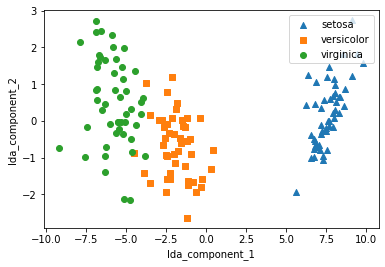

In [ ]:
#2차원 평면에 품종별 표현

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns = ['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns = lda_columns)
irisDF_lda['target'] = iris.target

markers = ['^','s','o']

for i,marker in enumerate(markers) :
  x_axis_data = irisDF_lda[irisDF_lda['target'] == i]['lda_component_1']
  y_axis_data = irisDF_lda[irisDF_lda['target'] == i]['lda_component_2']

  plt.scatter(x_axis_data,y_axis_data,marker = marker, label = iris.target_names[i])

plt.legend(loc = 'upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

---
## 4. SVD(Singular Value Decomposition)

### 1) SVD 개요
: PCA와 유사한 **행렬 분해 기법** 사용, 행과 열의 크기가 다른 행렬에도 적용 가능

$$ A = U\sum\ V^T$$

* $U,V$ : 특이벡터, 서로 **직교**하는 성질
* $\sum\$ : 대각행렬


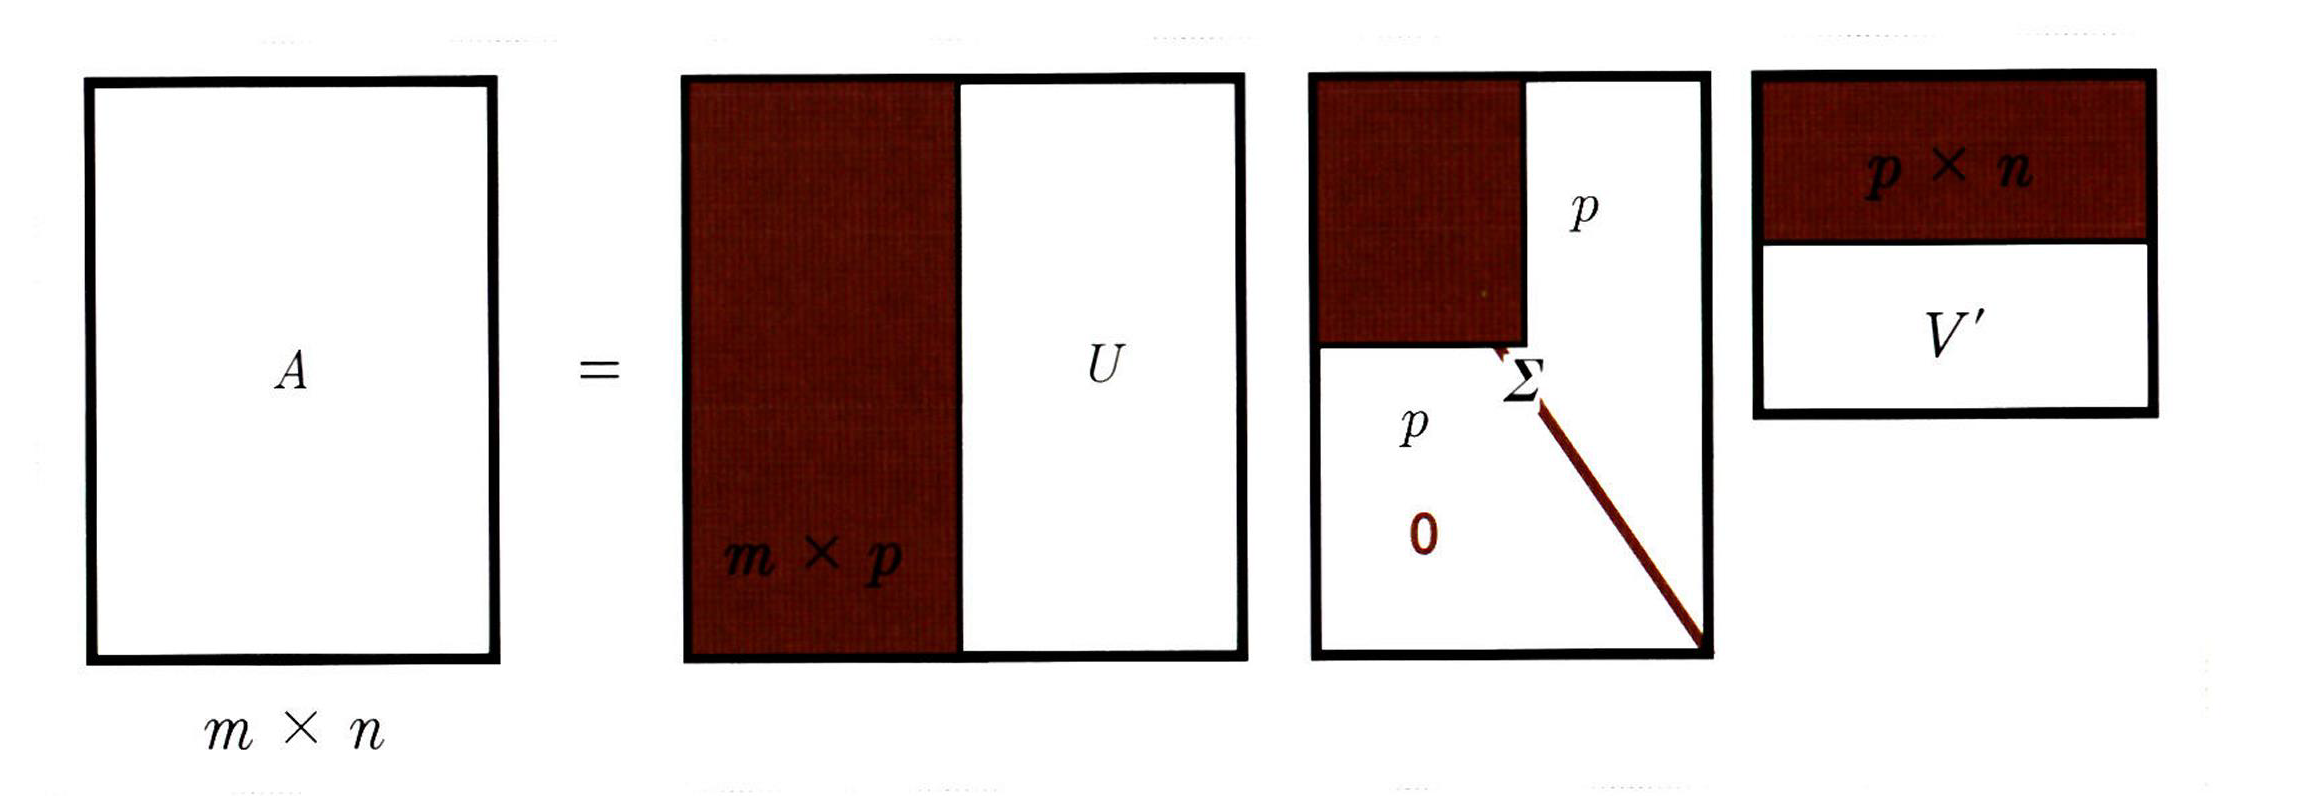

* Truncated SVD : 대각 원소 중에 상위 몇 개만 추출해서 여기에 대응하는 U와 V의 원소도 함께 제거해 더욱 차원을 줄인 형태로 분해하는 것

In [1]:
import numpy as np
from numpy.linalg import svd

np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [2]:
#SVD 분해는 numpy.linalg.svd에 파라미터로 원본 행렬을 입력하면 U행렬, sigma행렬, V 전치 행렬을 반환

U,Sigma ,Vt = svd(a)
print(U.shape,Sigma.shape,Vt.shape)
print('U matrix : \n', np.round(Sigma,3))
print('V transpose matrix : \n',np.round(Vt,3))

(4, 4) (4,) (4, 4)
U matrix : 
 [3.423 2.023 0.463 0.079]
V transpose matrix : 
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [3]:
#원본 행렬로의 복원 : U,Sigma,Vt를 다시 내적
#Sigma는 0이 아닌 값만 1차원으로 추출했으므로 대칭행렬로 다시 변환해야 함

Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U,Sigma_mat),Vt)
print(np.round(a_,3))


[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [4]:
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [5]:
U,Sigma, Vt = svd(a)
print(U.shape,Sigma.shape,Vt.shape)
print('Sigma Value : \n', np.round(Sigma,3))

(4, 4) (4,) (4, 4)
Sigma Value : 
 [2.663 0.807 0.    0.   ]


* Sigma 값 중 2개가 0으로 변함 -> `선형 독립인 로우 벡터의 개수가 2개`

In [7]:
U_ = U[:,:2]
Sigma_ = np.diag(Sigma[:2])
Vt_ = Vt[:2]
print(U_.shape,Sigma_.shape,Vt_.shape)
a_ = np.dot(np.dot(U_,Sigma_),Vt_)
print(np.round(a_,3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


* Truncated SVD : 대각행렬에 있는 특이값 중 상위 일부 데이터만 추출

 -> 데이터 정보가 압축되어 분해됨에도 불구하고 상당한 수준으로 원본 행렬 근사 가능

In [11]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

np.random.seed(121)
matrix = np.random.random((6,6))
print('원본 행렬 :\n', matrix)
U,Sigma,Vt = svd(matrix,full_matrices = False)
print('\n 분해 행렬 차원 :',U.shape,Sigma.shape, Vt.shape)
print('\n sigma값 행렬 : ', Sigma)

#Truncated SVD로 Sigma 행렬의 특이값으로 4개로 하여 수행
num_components = 4
U_tr, Sigma_tr,Vt_tr = svds(matrix,k = num_components)
print('\n Truncated SVD 분해 행렬 차원 :',U_tr.shape,Sigma_tr.shape, Vt_tr.shape)
print('\n Truncated SVD Sigma 값 행렬 : ', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr,np.diag(Sigma_tr)),Vt_tr)

print('\n Truncated SVD로 분해 후 복원 행렬 :\n',matrix_tr)

원본 행렬 :
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

 분해 행렬 차원 : (6, 6) (6,) (6, 6)

 sigma값 행렬 :  [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

 Truncated SVD 분해 행렬 차원 : (6, 4) (4,) (4, 6)

 Truncated SVD Sigma 값 행렬 :  [0.55463089 0.83865238 0.88116505 3.2535007 ]

 Truncated SVD로 분해 후 복원 행렬 :
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.938686

### 2) 사이킷런 TruncatedSVD 클래스를 이용한 변환

Text(0, 0.5, 'TruncatedSVD Component 2')

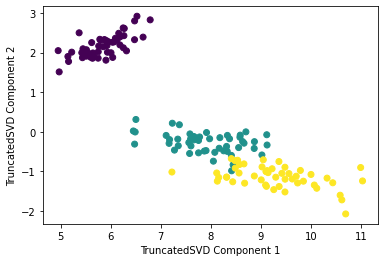

In [12]:
from sklearn.decomposition import TruncatedSVD,PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
#2개의 주요 컴포넌트로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components = 2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

plt.scatter(x = iris_tsvd[:,0], y = iris_tsvd[:,1],c = iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

Text(0.5, 1.0, 'PCA Transformed')

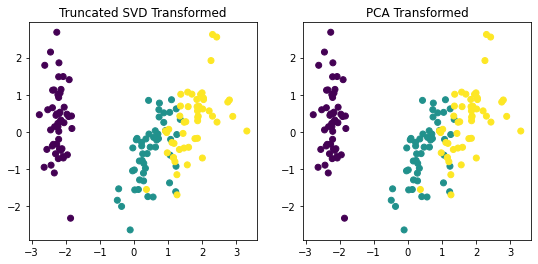

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

#TruncatedSVD 변환 수행
tsvd = TruncatedSVD(n_components = 2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

pca = PCA(n_components = 2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

fig,(ax1,ax2) = plt.subplots(figsize= (9,4),ncols = 2)
ax1.scatter(x = iris_tsvd[:,0],y = iris_tsvd[:,1],c = iris.target)
ax2.scatter(x = iris_pca[:,0],y = iris_pca[:,1],c = iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

In [16]:
# 두개의 변환 행렬 값과 원본 속성별 컴포넌트 비율값

print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())

2.3538231549065834e-15
7.632783294297951e-17


* 데이터 세트가 스케일링으로 데이터 중심이 동일해지면 사이킷런의 SVD와 PCA는 동일한 변환을 수행함

---
##5. NMF(Non-Negative Matrix Factorization)

### 1) NMF 개요
: Truncated SVD와 같이 낮은 랭크를 통한 행렬 근사 방식의 변형으로 원본 행렬 내의 모든 원소 값이 모두 **양수**라는 게 보장되면 두개의 기반 양수 행렬로 분해

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


Text(0, 0.5, 'NMF Component 2')

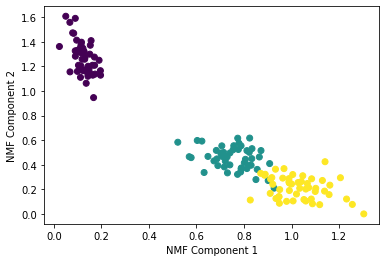

In [17]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components = 2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x = iris_nmf[:,0],y = iris_nmf[:,1],c = iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')